<a href="https://colab.research.google.com/github/archangel2006/PYML-ResearchPaper/blob/main/Life%20Expectancy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Life Expectancy Using Machine Learning :
A Comparative Approach Between Developed And Developing Countries

# Importing Modules

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [5]:
df = pd.read_csv('/content/Life Expectancy Data.csv')

# Data Exploration

In [6]:
df.shape

(2938, 22)

In [7]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [9]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [10]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


# Data Cleaning & Preprocessing

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.isnull().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,10
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0


Columns with very few missing values (less than ~5% of total rows)

- Life expectancy (10)
- Adult Mortality (10)
- BMI (34)
- Polio (19)
- Diphtheria (19)
- thinness 1-19 years (34)
- thinness 5-9 years (34)


Columns with larger gaps but numeric (up to ~30% missing)

- Total expenditure (226)
- Income composition of resources (167)
- Schooling (163)


In [13]:
# Renaming some column names as they contain trailing spaces.
df.rename(columns={" BMI ":"BMI","Life expectancy ":"Life Expectancy","Adult Mortality":"Adult Mortality",
                   "infant deaths":"Infant Deaths","percentage expenditure":"Percentage Expenditure","Hepatitis B":"Hepatitis B",
                  "Measles ":"Measles","under-five deaths ":"Under Five Deaths","Diphtheria ":"Diphtheria",
                  " HIV/AIDS":"HIV/AIDS"," thinness  1-19 years":"Thinness 1-19 Years"," thinness 5-9 years":"Thinness 5-9 Years",
                   "Income composition of resources":"Income Composition Of Resources",
                   "Total expenditure":"Total Expenditure"},inplace=True)


In [14]:
df.columns

Index(['Country', 'Year', 'Status', 'Life Expectancy', 'Adult Mortality',
       'Infant Deaths', 'Alcohol', 'Percentage Expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'Under Five Deaths', 'Polio', 'Total Expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Thinness 1-19 Years',
       'Thinness 5-9 Years', 'Income Composition Of Resources', 'Schooling'],
      dtype='object')

In [15]:
df = df.dropna(subset=['Life Expectancy', 'Adult Mortality']).copy()


In [16]:
df.shape

(2928, 22)

In [17]:
# Columns with small to medium missing values
cols_to_fill = [
    'BMI', 'Polio', 'Diphtheria', 'Thinness 1-19 Years', 'Thinness 5-9 Years',
    'Total Expenditure', 'Income Composition Of Resources', 'Schooling'
]

for col in cols_to_fill:
    df[col] = df.groupby('Country')[col].transform(lambda x: x.fillna(x.median()))




In [18]:
df.isna().sum()

,0
Country,0
Year,0
Status,0
Life Expectancy,0
Adult Mortality,0
Infant Deaths,0
Alcohol,193
Percentage Expenditure,0
Hepatitis B,553
Measles,0


In [19]:
df[cols_to_fill] = df[cols_to_fill].fillna(df[cols_to_fill].median())


In [20]:
df.isna().sum()

,0
Country,0
Year,0
Status,0
Life Expectancy,0
Adult Mortality,0
Infant Deaths,0
Alcohol,193
Percentage Expenditure,0
Hepatitis B,553
Measles,0


Missing values will be filled using country-wise medians to keep imputed values realistic for each region, with medians chosen for robustness against outliers.

For columns with over 50% missing data (e.g., Hepatitis B, GDP, Population), we avoid imputation as it can distort results.

In [21]:
# Alcohol (193 missing ≈ ~15%)

df['Alcohol'] = df.groupby('Country')['Alcohol'].transform(lambda x: x.fillna(x.median()))
df['Alcohol'] = df['Alcohol'].fillna(df['Alcohol'].median())


In [22]:
# Hepatitis B (553 missing ≈ ~40%)

df['Hepatitis B'] = df.groupby(['Country', 'Year'])['Hepatitis B'].transform(lambda x: x.fillna(x.median()))
df['Hepatitis B'] = df.groupby('Country')['Hepatitis B'].transform(lambda x: x.fillna(x.median()))
df['Hepatitis B'] = df['Hepatitis B'].fillna(df['Hepatitis B'].median())


In [23]:
# GDP (443 missing ≈ ~32%)

df['GDP'] = df.groupby('Country')['GDP'].transform(lambda x: x.fillna(x.median()))
df['GDP'] = df['GDP'].fillna(df['GDP'].median())


In [24]:
# Population (644 missing ≈ ~47%)

df['Population'] = df.groupby('Country')['Population'].transform(lambda x: x.fillna(x.median()))
df['Population'] = df['Population'].fillna(df['Population'].median())


In [25]:
df.isna().sum()

,0
Country,0
Year,0
Status,0
Life Expectancy,0
Adult Mortality,0
Infant Deaths,0
Alcohol,0
Percentage Expenditure,0
Hepatitis B,0
Measles,0


In [26]:
df.sample(3)

,Country,Year,Status,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,...,Polio,Total Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 Years,Thinness 5-9 Years,Income Composition Of Resources,Schooling
2752,United Arab Emirates,2009,Developing,76.0,84.0,1,1.73,292.402267,93.0,0,...,94.0,4.50,93.0,0.1,3372.575170,1396804.5,5.1,4.9,0.831,13.2
1386,Kiribati,2007,Developing,65.0,211.0,0,0.68,188.710877,96.0,0,...,93.0,13.66,94.0,0.1,1357.632211,96311.0,0.2,0.1,0.574,11.8
1988,Papua New Guinea,2002,Developing,59.3,327.0,11,0.61,110.980306,6.0,17620,...,54.0,7.69,61.0,1.4,511.665773,5862316.0,1.5,1.5,0.428,6.9


In [27]:
num_columns = df.select_dtypes(include=[np.number]).columns.tolist()
num_columns

['Year',
 'Life Expectancy',
 'Adult Mortality',
 'Infant Deaths',
 'Alcohol',
 'Percentage Expenditure',
 'Hepatitis B',
 'Measles',
 'BMI',
 'Under Five Deaths',
 'Polio',
 'Total Expenditure',
 'Diphtheria',
 'HIV/AIDS',
 'GDP',
 'Population',
 'Thinness 1-19 Years',
 'Thinness 5-9 Years',
 'Income Composition Of Resources',
 'Schooling']

# Feature Density

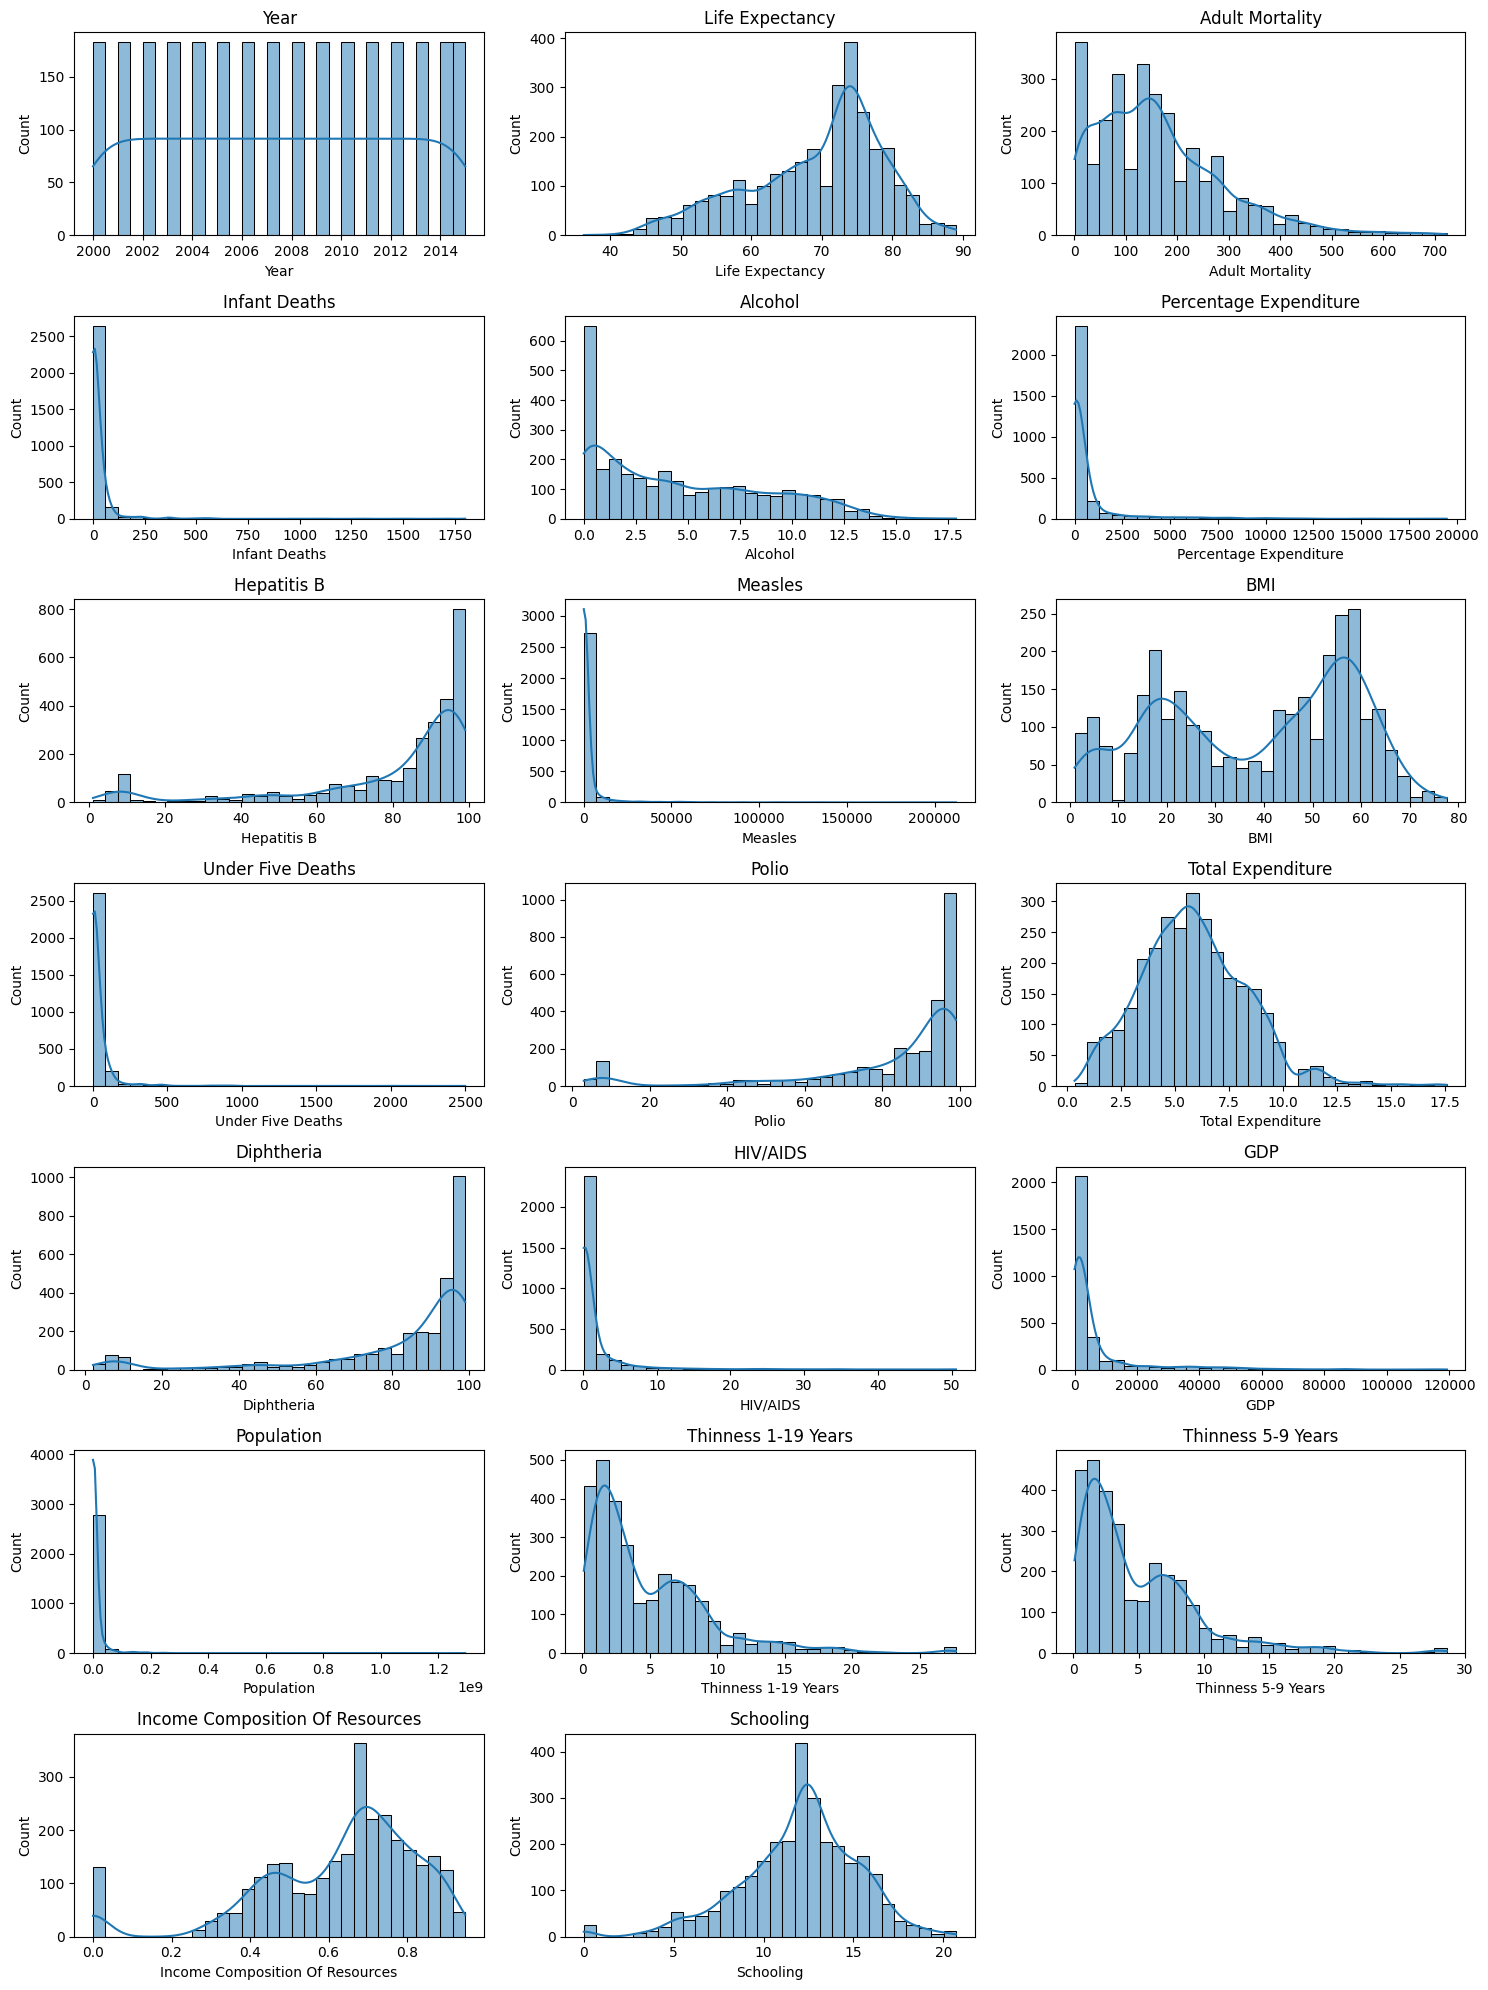

In [28]:
# Distribution Plots

plt.figure(figsize=(15,20))
for i,col in enumerate(num_columns,1):
  plt.subplot((len(num_columns) // 3)+1,3,i)
  sns.histplot(df[col],kde=True,bins=30, )
  plt.title(col)
plt.tight_layout()
plt.show()


# Outlier Detection & Removal

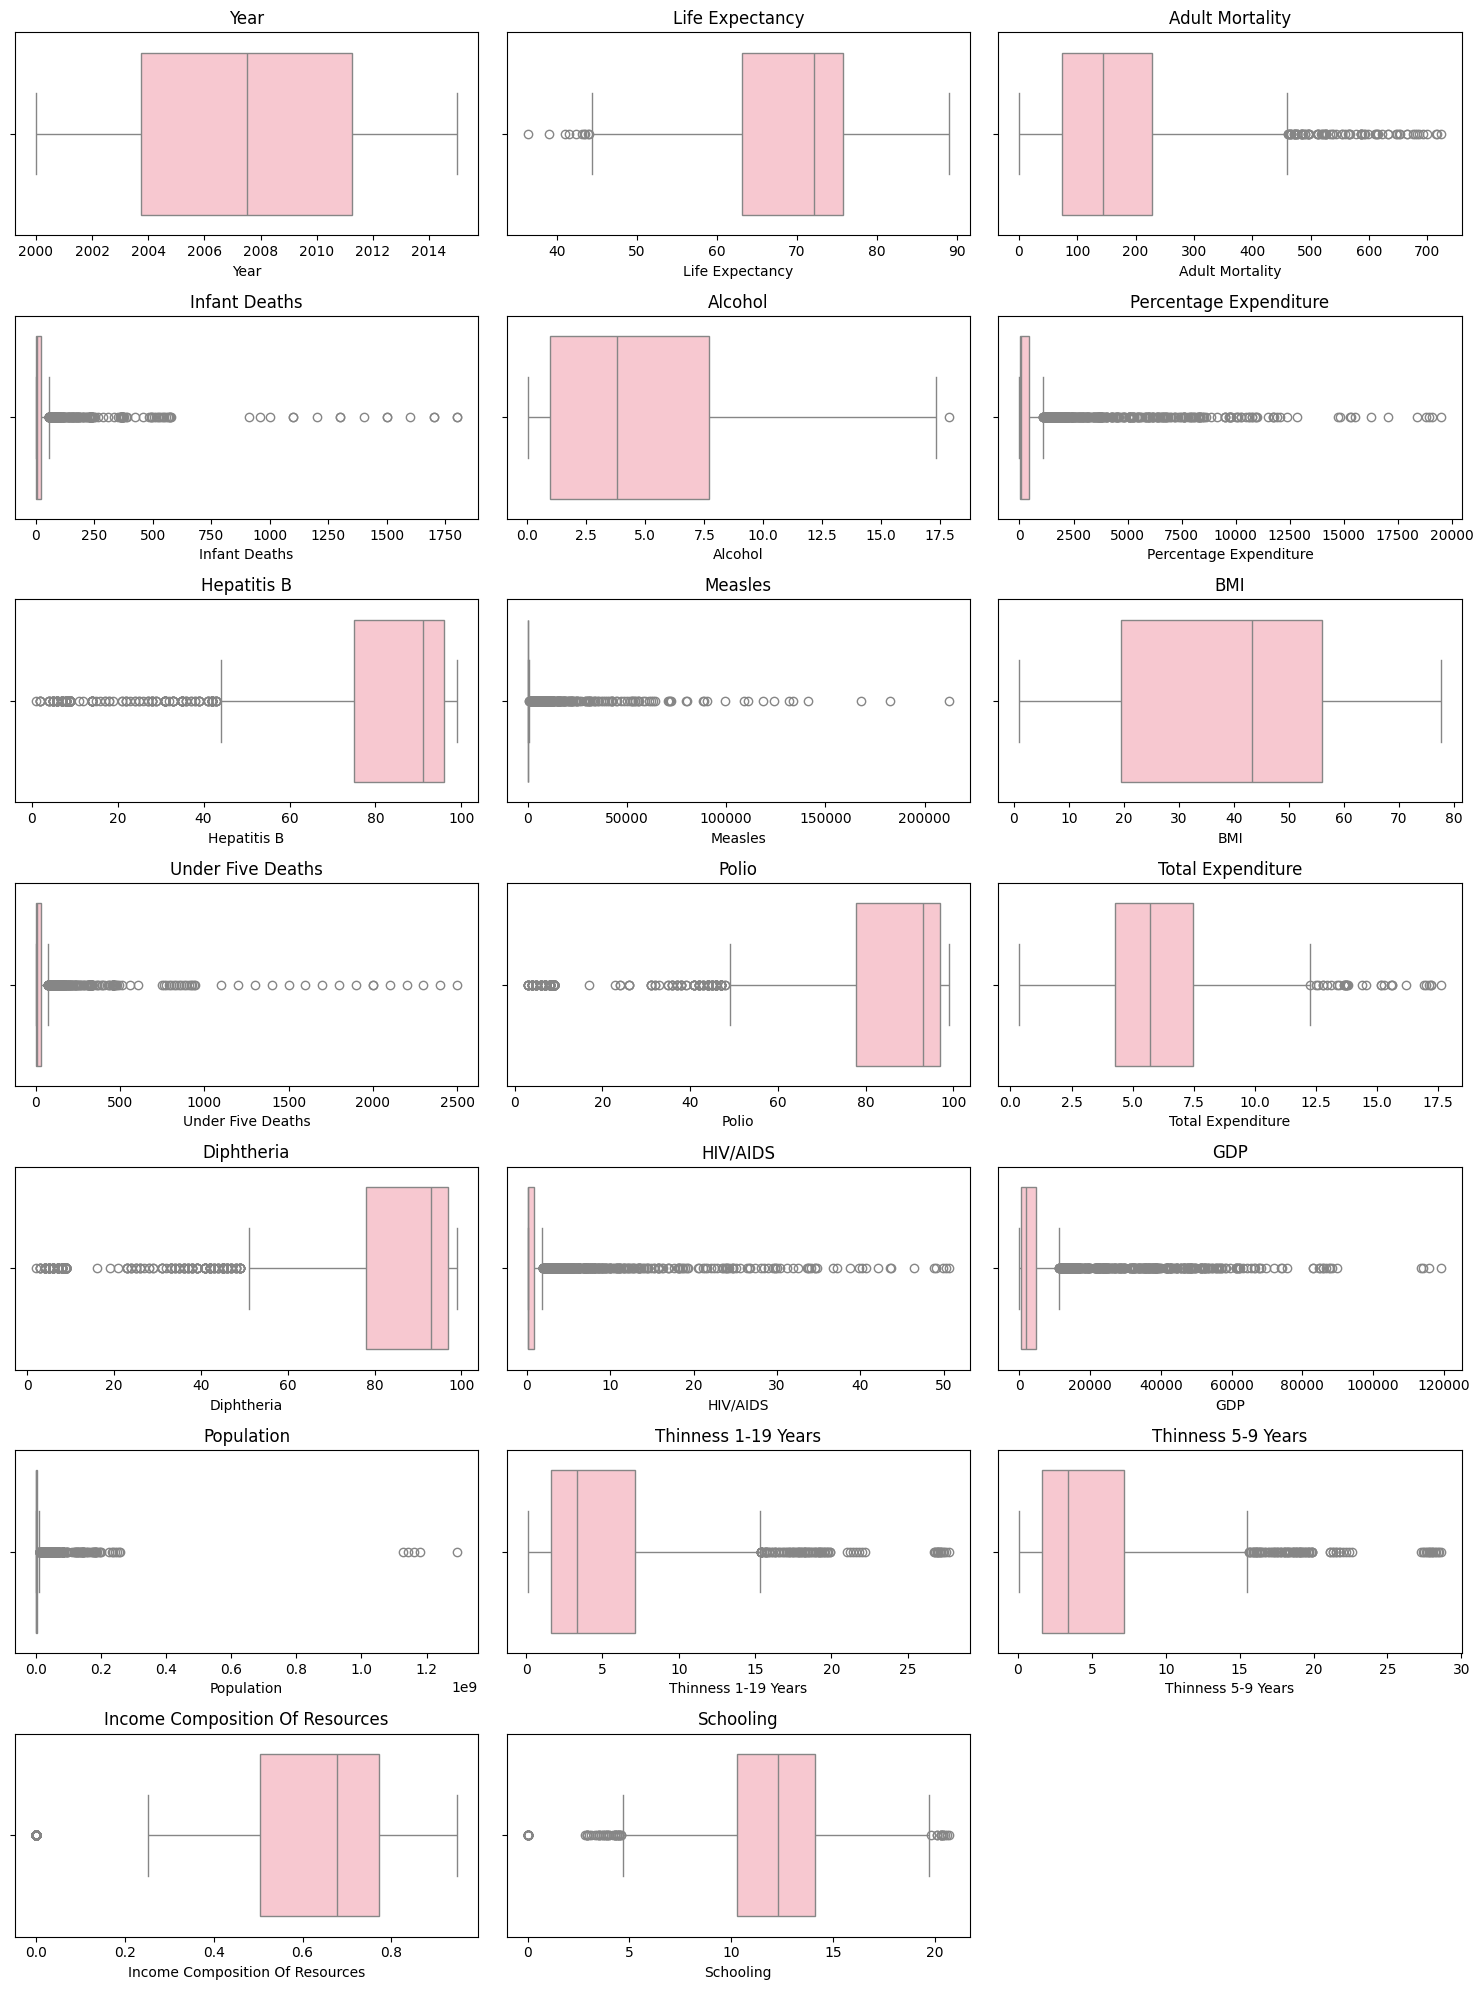

In [29]:
# Boxplots

plt.figure(figsize=(15,20))
for i,col in enumerate(num_columns,1):
  plt.subplot((len(num_columns) // 3)+1,3,i)
  sns.boxplot(x=df[col], color='pink')
  plt.title(col)
plt.tight_layout()
plt.show()

In [30]:
# # Remove outliers using IQR Method

# def remove_outliers(data,column):
#   Q1 = data[column].quantile(0.25)
#   Q3 = data[column].quantile(0.75)
#   IQR = Q3 - Q1
#   lower = Q1 - 1.5*IQR
#   upper = Q3
#   return data[(data[column]>=lower) & (data[column]<=upper)]


# # Applying to all numerical columns

# for col in num_columns:
#   df = remove_outliers(df,col)

# df.reset_index(drop=True, inplace=True)
# print("After outlier removal:", df.shape)




Applying outlier removal to all columns shape of data reduced to just 6 rows..which is no use, so we now select columns which might realistically have incorrect/ false data

| Column                        | Reason to Remove Outliers                                                                      |
| ----------------------------- | ---------------------------------------------------------------------------------------------- |
| **Life expectancy**           | Should fall within a realistic human range (20–90). Extreme values are likely errors.          |
| **Adult Mortality**           | Unrealistically high (>1000) or zero values can be data entry errors.                          |
| **Alcohol**                   | Values > 20 liters/year per capita are highly unusual and could distort trends.                |
| **Percentage expenditure**    | Extreme spikes are often due to small GDP values causing inflated ratios.                      |
| **Hepatitis B**               | Extreme values (negative, >100) are impossible.                                                |
| **BMI / Thinness indicators** | Thinness 1–19, Thinness 5–9 — extreme values (>30) often unrealistic for a population measure. |
| **Schooling**                 | Usually ranges 0–20 years; anything above/below is likely incorrect.                           |


In [31]:
outlier_cols = [
    'Life Expectancy',
    'Adult Mortality',
    'Alcohol',
    'Percentage Expenditure',
    'Hepatitis B',
    'BMI',
    'Thinness 1-19 Years',
    'Thinness 5-9 Years',
    'Schooling'
]

def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

df_clean = remove_outliers_iqr(df, outlier_cols)

print(f"Before: {df.shape}")
print(f"After: {df_clean.shape}")

Before: (2928, 22)
After: (2050, 22)


# Correlations

In [32]:
corr = df_clean.corr(numeric_only=True)
corr

,Year,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,BMI,Under Five Deaths,Polio,Total Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 Years,Thinness 5-9 Years,Income Composition Of Resources,Schooling
Year,1.000000,0.120344,-0.023359,-0.018147,-0.057294,0.019592,0.094989,-0.070322,0.067880,-0.020663,0.104898,0.091415,0.174794,-0.078207,0.184570,0.035161,-0.040416,-0.039844,0.216555,0.183830
Life Expectancy,0.120344,1.000000,-0.607995,-0.354233,0.346789,0.308404,0.460528,-0.154584,0.549465,-0.377985,0.451121,0.220776,0.491423,-0.552839,0.316294,-0.035149,-0.534811,-0.539637,0.631193,0.715704
Adult Mortality,-0.023359,-0.607995,1.000000,0.191386,-0.144524,-0.183463,-0.279041,0.022320,-0.364927,0.203898,-0.276649,-0.134910,-0.269692,0.271175,-0.192517,0.029149,0.306223,0.318241,-0.347994,-0.403320
Infant Deaths,-0.018147,-0.354233,0.191386,1.000000,-0.074303,-0.134212,-0.337623,0.604167,-0.272357,0.992349,-0.284251,-0.157526,-0.285792,0.153078,-0.108013,0.319963,0.245676,0.248298,-0.202353,-0.274167
Alcohol,-0.057294,0.346789,-0.144524,-0.074303,1.000000,0.171196,0.206418,-0.024077,0.256867,-0.060158,0.195577,0.274817,0.203528,-0.044703,0.172988,0.012478,-0.381921,-0.377186,0.340505,0.467202
Percentage Expenditure,0.019592,0.308404,-0.183463,-0.134212,0.171196,1.000000,0.177383,-0.070628,0.210411,-0.132774,0.139867,0.069477,0.176177,-0.083514,0.396165,0.041302,-0.169136,-0.172764,0.284542,0.357589
Hepatitis B,0.094989,0.460528,-0.279041,-0.337623,0.206418,0.177383,1.000000,-0.167997,0.241209,-0.353912,0.600233,0.149238,0.642784,-0.180254,0.186320,-0.077472,-0.193928,-0.210698,0.320284,0.408349
Measles,-0.070322,-0.154584,0.022320,0.604167,-0.024077,-0.070628,-0.167997,1.000000,-0.150583,0.583571,-0.141758,-0.107590,-0.159771,0.054610,-0.051988,0.124642,0.144640,0.153124,-0.103714,-0.111020
BMI,0.067880,0.549465,-0.364927,-0.272357,0.256867,0.210411,0.241209,-0.150583,1.000000,-0.274565,0.253547,0.227820,0.266431,-0.291110,0.235622,-0.045075,-0.522777,-0.539159,0.434760,0.503800
Under Five Deaths,-0.020663,-0.377985,0.203898,0.992349,-0.060158,-0.132774,-0.353912,0.583571,-0.274565,1.000000,-0.299531,-0.155039,-0.304907,0.170743,-0.108608,0.306082,0.262818,0.262492,-0.219860,-0.283662


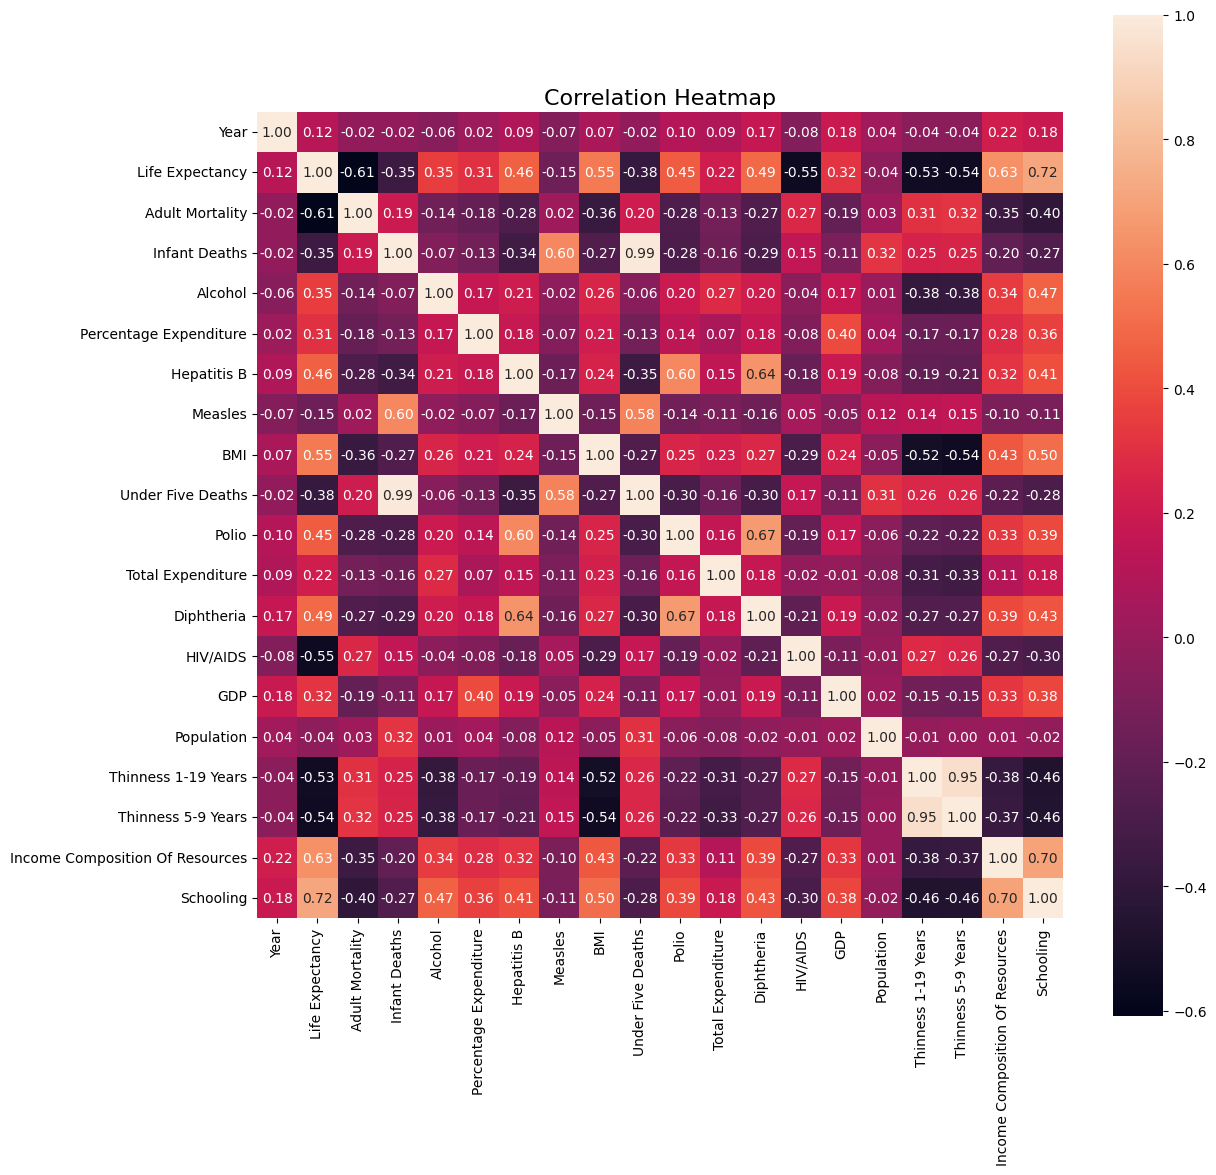

In [33]:
# Correlation Heatmap

plt.figure(figsize=(13,13))

sns.heatmap(corr,
            annot=True,
            fmt=".2f",
            cbar=True,
            square=True)

plt.title("Correlation Heatmap", fontsize=16)
plt.show()


In [34]:
# Correlation with life expectancy

corr_with_life = df.corr(numeric_only=True)['Life Expectancy'].sort_values(ascending=False)
corr_with_life



,Life Expectancy
Life Expectancy,1.000000
Schooling,0.717314
Income Composition Of Resources,0.688591
BMI,0.558888
Diphtheria,0.485097
Polio,0.471586
GDP,0.431990
Alcohol,0.405724
Percentage Expenditure,0.381864
Hepatitis B,0.302137


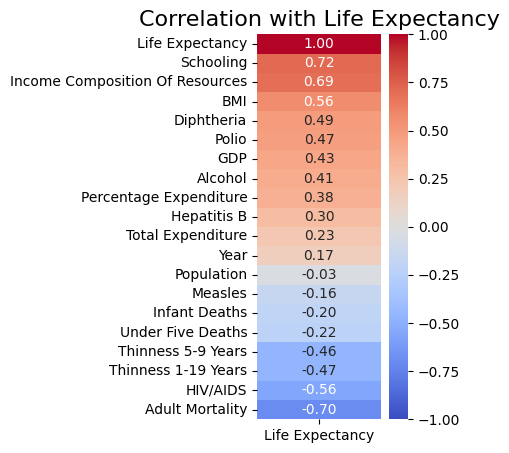

In [35]:
# Correlation Heatmap with Life Expectancy

corr_with_life_df = corr_with_life.to_frame()  # Convert Series to DataFrame for heatmap

plt.figure(figsize=(2,5))
sns.heatmap(corr_with_life_df,
            annot=True,
            fmt=".2f",
            cbar=True,
            square=False,
            cmap="coolwarm",
            vmin=-1, vmax=1)

plt.title("Correlation with Life Expectancy", fontsize=16)
plt.show()


- **Strong positive correlation**: Schooling, Income Composition of Resources, BMI.

- **Moderate positive correlation**: Diphtheria, Polio, GDP, Alcohol, Percentage Expenditure, Hepatitis B.

- **Weak positive correlation**: Total Expenditure, Year.

- **Weak/negative correlation**: Population, Measles, Infant Deaths, Under Five Deaths.

- **Strong negative correlation**: Thinness (1–19 years, 5–9 years), HIV/AIDS, Adult Mortality.

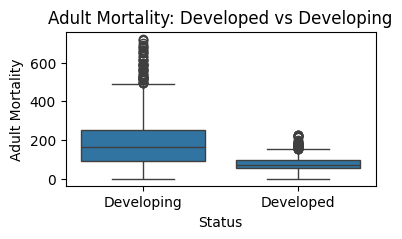

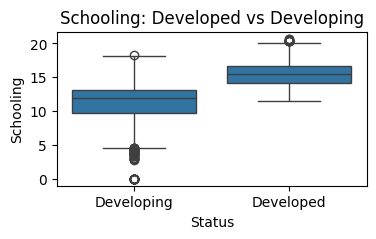

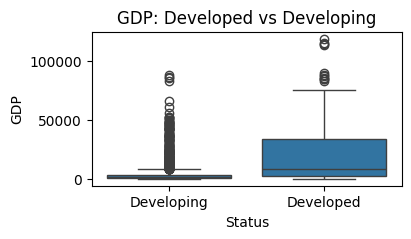

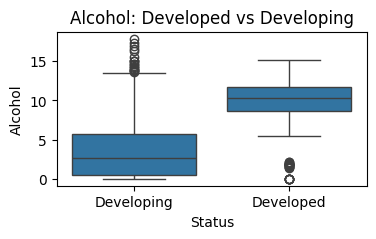

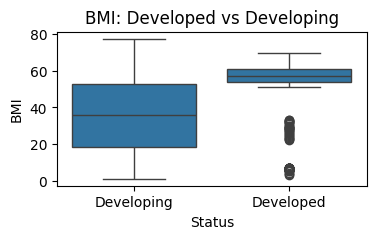

In [36]:
# Developed vs Developing Feature Comparison

features_to_compare = ['Adult Mortality', 'Schooling', 'GDP', 'Alcohol', 'BMI']
for feature in features_to_compare:
    plt.figure(figsize=(4,2))
    sns.boxplot(x='Status', y=feature, data=df)
    plt.xticks([0, 1], ['Developing', 'Developed'])
    plt.title(f"{feature}: Developed vs Developing")
    plt.show()


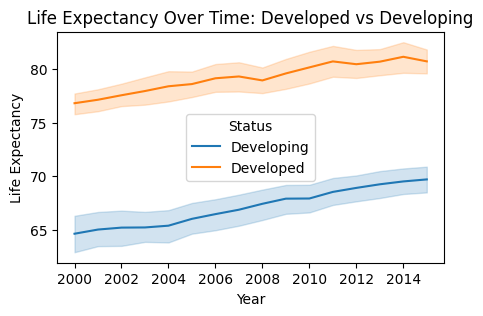

In [37]:
# Yearly Trends

plt.figure(figsize=(5,3))
sns.lineplot(x='Year', y='Life Expectancy', hue='Status', data=df)
plt.title("Life Expectancy Over Time: Developed vs Developing")
plt.show()


# Feature Engineering

In [38]:
# Log transform skewed features
df['GDP'] = np.log1p(df['GDP'])
df['Population'] = np.log1p(df['Population'])

# Drop columns with little predictive power if correlation is too low (optional)


In [39]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
skew_values = df[numeric_cols].skew().sort_values(ascending=False)

print("Skewness of numeric columns:\n", skew_values)

Skewness of numeric columns:
 Infant Deaths                      9.771044
Under Five Deaths                  9.479623
Measles                            9.425290
HIV/AIDS                           5.386623
Percentage Expenditure             4.643790
Thinness 5-9 Years                 1.793650
Thinness 1-19 Years                1.727662
Adult Mortality                    1.174369
Alcohol                            0.589119
Total Expenditure                  0.587661
Year                               0.000000
GDP                               -0.134998
BMI                               -0.239842
Schooling                         -0.615206
Life Expectancy                   -0.638605
Population                        -0.693166
Income Composition Of Resources   -1.208178
Hepatitis B                       -1.830203
Diphtheria                        -2.047104
Polio                             -2.070627
dtype: float64


In [40]:
# Features to log-transform

skewed_cols = [
    'Population',
    'Infant Deaths',
    'Under Five Deaths',
    'Measles',
    'HIV/AIDS',
    'Percentage Expenditure',
    'GDP'
]

# Apply log(1+x) transformation
for col in skewed_cols:
    df[col] = np.log1p(df[col])


In [41]:
# Encoding  'Status' (Developed=1, Developing=0)

df['Status'] = df['Status'].map({'Developed':1, 'Developing':0})


In [42]:
df.sample(2)

,Country,Year,Status,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,...,Polio,Total Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 Years,Thinness 5-9 Years,Income Composition Of Resources,Schooling
2761,United Arab Emirates,2000,0,74.2,17.0,0.693147,1.64,5.575794,92.0,4.248495,...,94.0,2.38,94.0,0.09531,2.210836,2.717981,5.4,5.1,0.791,11.8
902,Fiji,2011,0,69.2,197.0,0.000000,0.01,5.998423,99.0,0.000000,...,99.0,4.60,99.0,0.09531,2.238460,2.515372,4.0,3.7,0.709,14.7


# Model Building

In [43]:
# Target variable
y = df['Life Expectancy']

# Features (drop target and non-numeric identifiers)
x = df.drop(['Life Expectancy', 'Country', 'Year'], axis=1)


In [44]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42)


In [45]:
scaler = StandardScaler()

# Fit on training data and transform
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [76]:
# Initialize models
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.1),
    'DecisionTree': DecisionTreeRegressor(random_state=42),
    'RandomForest': RandomForestRegressor(n_estimators=300, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
}

# Train and evaluate

results = {}

for name, model in models.items():
    # Scale linear models
    if name in ['LinearRegression', 'Ridge', 'Lasso']:
        model.fit(x_train_scaled, y_train)
        y_pred = model.predict(x_test_scaled)
    else:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {'RMSE': rmse, 'MAE': mae, 'R2': r2}

results_df = pd.DataFrame(results).T
print(results_df)


                      RMSE       MAE        R2
LinearRegression  3.547007  2.734148  0.854551
Ridge             3.547213  2.733296  0.854534
Lasso             3.571038  2.736260  0.852573
DecisionTree      2.604345  1.538396  0.921588
RandomForest      1.712143  1.072699  0.966110
XGBoost           2.126116  1.525163  0.947741


# Final Model Evaluation & Comparisions

| Model                 | Interpretation                                                                    |
| --------------------- | --------------------------------------------------------------------------------- |
| **Linear Regression** | Baseline linear model; captures general trends; R² ≈ 0.85.                        |
| **Ridge**             | Linear model with L2 regularization; similar performance to Linear Regression.    |
| **Lasso**             | Linear model with L1 regularization; slightly worse due to feature shrinkage.     |
| **Decision Tree**     | Handles non-linear patterns; R² ≈ 0.92; prone to overfitting alone.               |
| **Random Forest**     | Ensemble of trees; best performance (R² ≈ 0.97); stable and accurate.             |
| **XGBoost**           | Gradient boosting ensemble; strong performance (R² ≈ 0.95); can be tuned further. |


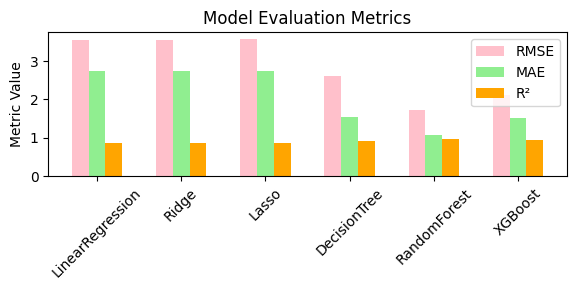

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# Models and metrics
models = ['LinearRegression', 'Ridge', 'Lasso', 'DecisionTree', 'RandomForest', 'XGBoost']
rmse = [3.547, 3.547, 3.571, 2.604, 1.712, 2.126]
mae = [2.734, 2.733, 2.736, 1.538, 1.072, 1.525]
r2 = [0.855, 0.855, 0.853, 0.922, 0.966, 0.958280]

x = np.arange(len(models))
width = 0.20

plt.figure(figsize=(6,3))
plt.bar(x - width, rmse, width=width, label='RMSE', color='pink')
plt.bar(x, mae, width=width, label='MAE', color='lightgreen')
plt.bar(x + width, r2, width=width, label='R²', color='orange')

plt.xticks(x, models, rotation=45)
plt.ylabel('Metric Value')
plt.title('Model Evaluation Metrics')
plt.legend()
plt.tight_layout()
plt.show()


# Hyperparameter Tuning

In [77]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score

rf = RandomForestRegressor(random_state=42)

param_dist_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 15],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rand_search_rf = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist_rf,
    n_iter=20,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

rand_search_rf.fit(x_train, y_train)


best_rf_params = rand_search_rf.best_params_
best_rf_r2 = r2_score(y_test, rand_search_rf.predict(x_test))

print("Best RF Parameters:", best_rf_params)
print("Best RF Test R²:", best_rf_r2)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best RF Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}
Best RF Test R²: 0.9656389529172879


In [49]:
rf = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid,
                       cv=5, scoring='r2', n_jobs=-1, verbose=1)
grid_rf.fit(x_train, y_train)

print("Best Parameters RF:", grid_rf.best_params_)
print("Best R² RF:", grid_rf.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters RF: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best R² RF: 0.9580926332154427


Hyperparameter tuning via RandomizedSearchCV and GridSearchCV found slightly different optimal parameters than the original Random Forest, but the original model still performed best on the test set (R² = 0.966). This shows that the default parameters were already highly suitable for the dataset

| Model Setup                    | Parameters                                                                                | R² (Test / CV) | Notes                                                                    |
| ------------------------------ | ----------------------------------------------------------------------------------------- | -------------- | ------------------------------------------------------------------------ |
| Original Random Forest         | `n_estimators=300, random_state=42`                                                       | 0.9655 (test)  | Default parameters; performed very well on test set                      |
| GridSearchCV (5-fold CV)       | `{'n_estimators': 300, 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1}` | 0.9581 (CV)    | Best cross-validated parameters; slightly lower CV R² than original test |
| RandomizedSearchCV (3-fold CV) | `{'n_estimators': 300, 'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 1}`   | 0.9538 (CV)    | Fewer random combinations; slightly lower CV R²; faster to compute       |


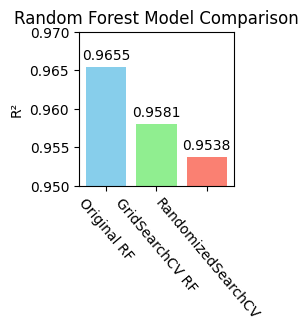

In [64]:
# Comparing RF models after hyperparameter tuning

models = ['Original RF', 'GridSearchCV RF', 'RandomizedSearchCV']
r2_values = [0.9655, 0.9581, 0.9538]

plt.figure(figsize=(2,2))
bars = plt.bar(models, r2_values, color=['skyblue','lightgreen','salmon'])
plt.ylim(0.95, 0.97)
plt.ylabel('R²')
plt.xticks(rotation=-50)
plt.title('Random Forest Model Comparison')

# Annotate values on bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.0005, f'{yval:.4f}', ha='center', va='bottom')

plt.show()

In [83]:
xgb = XGBRegressor(random_state=42, objective='reg:squarederror')

param_dist_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

rand_search_xgb = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist_xgb,
    n_iter=20,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

rand_search_xgb.fit(x_train, y_train)

best_xgb_params = rand_search_xgb.best_params_
best_xgb_r2 = r2_score(y_test, rand_search_xgb.predict(x_test))

print("Best XGB Parameters:", best_xgb_params)
print("Best XGB R²:", best_xgb_r2)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best XGB Parameters: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
Best XGB R²: 0.9706045488018613


# Feature Importance

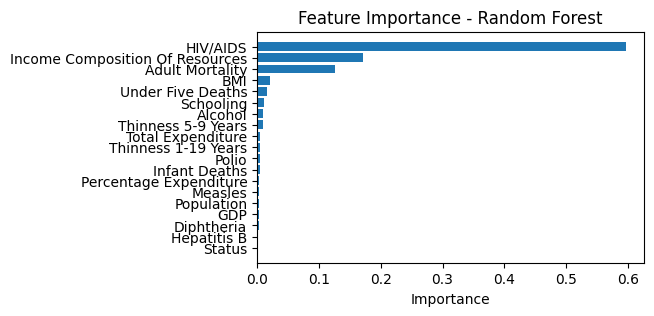

In [109]:
rf_model = RandomForestRegressor(n_estimators=300, random_state=42)
rf_model.fit(x_train, y_train)

# feature importances
importances = rf_model.feature_importances_
features = x_train.columns


feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(5,3))
plt.barh(feat_df['Feature'], feat_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.title('Feature Importance - Random Forest')
plt.show()


Top predictors for life expectancy include:
- HIV/AIDS
- Income Composition Of Resources
- Adult Mortality
- BMI

This provides interpretability and insights for policy and health interventions.

# Final Model Conclusion

- RandomizedSearchCV and GridSearchCV were performed for Random Forest and XGBoost.

- For Random Forest, tuning produced slightly different parameters but did not outperform the original model, which remained the best.

- For XGBoost, tuning improved generalization on the test set, achieving R² = 0.9706 with optimized parameters:

# Comparative Analysis Of Developed Vs Developing Countries

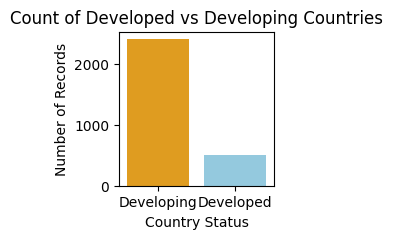

In [108]:
df['Status'] = df['Status'].map({0: 'Developing', 1: 'Developed'})

# Plot countplot
plt.figure(figsize=(2,2))
sns.countplot(data=df, x='Status', hue='Status', palette=['orange', 'skyblue'])
plt.title('Count of Developed vs Developing Countries')
plt.ylabel('Number of Records')
plt.xlabel('Country Status')
plt.show()

In [91]:

x_test_dev = x_test[x_test['Status'] == 1]
y_test_dev = y_test[x_test['Status'] == 1]

x_test_devp = x_test[x_test['Status'] == 0]
y_test_devp = y_test[x_test['Status'] == 0]


In [94]:
# Random Forest
y_pred_dev = rf_model.predict(x_test_dev)
y_pred_devp = rf_model.predict(x_test_devp)

metrics_dev = {
    'RMSE': np.sqrt(mean_squared_error(y_test_dev, y_pred_dev)),
    'MAE': mean_absolute_error(y_test_dev, y_pred_dev),
    'R2': r2_score(y_test_dev, y_pred_dev)
}

metrics_devp = {
    'RMSE': np.sqrt(mean_squared_error(y_test_devp, y_pred_devp)),
    'MAE': mean_absolute_error(y_test_devp, y_pred_devp),
    'R2': r2_score(y_test_devp, y_pred_devp)
}


metrics_df = pd.DataFrame([metrics_dev, metrics_devp], index=['Developed', 'Developing'])


metrics_df = metrics_df.round(3)

print(metrics_df)


             RMSE    MAE     R2
Developed   1.506  0.995  0.797
Developing  1.755  1.090  0.961


In [97]:
# Developed
rf_dev = RandomForestRegressor(n_estimators=300, random_state=42)
rf_dev.fit(x_test_dev, y_test_dev)
feat_imp_dev = pd.Series(rf_dev.feature_importances_, index=x_test_dev.columns)

# Developing
rf_devp = RandomForestRegressor(n_estimators=300, random_state=42)
rf_devp.fit(x_test_devp, y_test_devp)
feat_imp_devp = pd.Series(rf_devp.feature_importances_, index=x_test_devp.columns)


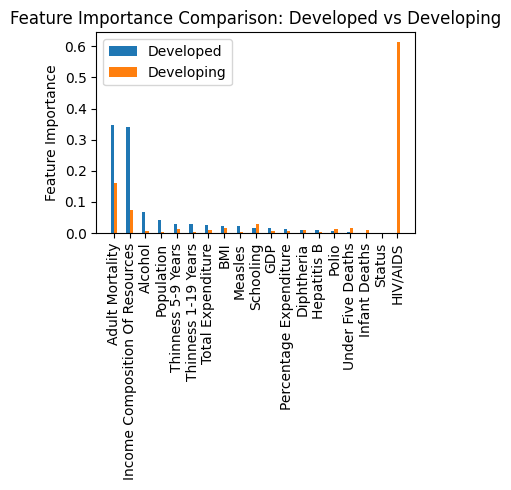

In [104]:
feat_df = pd.DataFrame({
    'Developed': feat_imp_dev,
    'Developing': feat_imp_devp
}).sort_values(by='Developed', ascending=False)

# Plot
x = np.arange(len(feat_df))
width = 0.20

plt.figure(figsize=(4,5))
plt.bar(x - width/2, feat_df['Developed'], width, label='Developed')
plt.bar(x + width/2, feat_df['Developing'], width, label='Developing')

plt.xticks(x, feat_df.index, rotation=90)
plt.ylabel('Feature Importance')
plt.title('Feature Importance Comparison: Developed vs Developing')
plt.legend()
plt.tight_layout()
plt.show()


1. Key Factors Affecting Life Expectancy

  - Developed countries: Adult mortality and income composition of resources are the strongest contributors.
  - **Developing countries**: HIV/AIDS has the highest impact, followed by adult mortality and alcohol consumption.

2. Health vs Socioeconomic Influence
  - **Developed countries**: Life expectancy is influenced more by overall health infrastructure and socioeconomic resources.
  - **Developing countries**: Life expectancy is more affected by specific health crises and preventable diseases.

3. Moderate Contributors
  - Factors such as BMI, schooling, GDP, measles, polio, and diphtheria impact life expectancy in both groups, but their effect is less dominant.

4. Policy Implications
  - **Developed countries**: Policies improving socioeconomic conditions and reducing adult mortality could further increase life expectancy.
  - **Developing countries**: Targeted healthcare interventions against HIV/AIDS and other preventable diseases may have the most immediate effect.

# Final Conclusion Of Life Expectancy

Globally, HIV/AIDS is the top contributor to life expectancy, followed by income composition, adult mortality, and BMI. However, its impact is minimal in developed countries and largely drives life expectancy differences in developing countries. In contrast, developed countries are more influenced by socioeconomic factors and adult mortality, highlighting the need for context-specific health and policy interventions.